# Lead Scoring Case Study
### Submitted By - Seema S B, Vibhu Adithya

Problem Statement: 
1. To build a model to find out the leads that are most likely to convert into paying customers.
2. To find the conversion rate of customers based on scoring of the leads.

Solution Approach:

The following approach has been carried out to arrive at the solution for the given problem:
1. Data Understanding
2. Data Cleaning
3. Data Visualization
4. Data Preparation
5. Modelling

### Data Understanding

#### Import packages

In [1]:
# Importing the required packages
import warnings
warnings.filterwarnings('ignore')
from math import log
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 250)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

#### Reading the Data

In [2]:
# Reading the data from the given csv file
lead_df = pd.read_csv('Leads.csv')

In [3]:
# Viewing the Data
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Shape of the dataframe

In [4]:
# Finding out the no.of rows and columns in the dataset
initial = lead_df.shape
initial

(9240, 37)

**Information of the dataframe**

In [5]:
# To understand the datatypes of each columns and non-null records
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

We could see that there are many columns which has got `null` values. Also there are various types of columns like `float`, `int64` and `categoricals`.

### Data Cleaning

**Null percentage of columns**

In [6]:
# Finding out the percentage of null records in each column
round(lead_df.isnull().sum()/len(lead_df) * 100, 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

The columns `'Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'Tags'` has the maximum percentage of null values in them, so it is better to drop these

**Dropping the columns with high null percentage**

In [7]:
# Dropping columns having more null values
lead_df.drop(['Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
             'Asymmetrique Profile Score', 'Tags'], inplace=True, axis=1)

**Value Counts of all the columns**

In [8]:
# Finding the value counts for each columns
for col in lead_df:
    if lead_df[col].dtype == 'O':
        print(round(lead_df[col].value_counts()/len(lead_df) * 100, 2))
        print('=====================================')

c242a6d8-3f29-449b-a4b8-9c2cadc6d8b7    0.01
33bfc01d-6467-4336-b2b9-943faa30b866    0.01
2a6dce70-e6cd-4281-95e1-dbd68157fcc8    0.01
be7c9c8a-f114-4ecd-af47-01c3f35e33fb    0.01
700b2f7c-a58d-4b29-bf7d-606323eb32ca    0.01
278a0485-6686-4f1b-88ef-a8858eaf9f5b    0.01
8a1d6f50-3bf6-414e-99ae-6494b1d29b24    0.01
c0721950-20b7-451e-bff3-3e21adb3028f    0.01
3525909d-0d79-4ca6-a4af-1fe7f80d711d    0.01
d60b3133-9845-4d68-8675-6666c7dc57c9    0.01
196bf461-dbef-4c26-8876-12200442abae    0.01
b8f2c89e-9378-415a-a18c-3192c3362c9c    0.01
d4dfecf6-ef74-4af9-b660-2890c663e9d1    0.01
c309cc6d-204f-4ac0-a766-7d326bd01218    0.01
34a8ad95-b6ea-45dd-abd4-3b7b97efec84    0.01
b081f88e-11e8-4605-a2a0-4f5b1e8a1ff1    0.01
a94092fd-f8e5-41ba-81b8-207591ebe457    0.01
7d9e3998-bfe7-4ad3-a18e-ee446de34466    0.01
8b0dffdf-116e-4ec5-a528-bb2e6844f73f    0.01
bead1a16-28e9-436b-b4f6-dc21e82a51c3    0.01
e827d836-5d5f-4d74-9dc6-deb90bb4e7df    0.01
ad74f63b-0102-4c8f-847a-71bfbf31e761    0.01
11b54032-6

Based on the value counts in each columns, we can infer and perform the below steps:
1. The column `Country` has the values mostly as 'India' and also there are null values too. So we should drop this column. The same applies for the column `City`, so dropping it as well
2. The columns `'Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'` are highly Skewed so dropping them  
3. The column `What matters most to you in choosing a course` appears to be highly skewed towards the value `Better Career Prospects`, so it is better to drop the column
4. There are various categorical columns which has got the value `Select` as one of its level because it gets populated as default if no other option has been selected by the customer. So this is equivalent to null values
5. The columns `Lead Profile` and `How did you hear about X Education` has large number of `Select` which is equivalent to higher null percentage so dropping those columns
6. We can drop rows having null values in more than `five` coulmns as it will not impact the target variable
7. Though the column `What is your current occupation` has a high number of null records, it is advisable not to drop it because the enrollment of customers to an education platform may be highly impacted based on their occupation or field of work. So only the null records could be dropped while the column is retained 

**Dropping the columns which doesn't add any information to the data**

In [9]:
# Dropping columns which doesn't add any information on the dataset
lead_df.drop(['Country', 'City'], axis=1, inplace=True)
round(lead_df.isnull().sum()/len(lead_df) * 100, 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

**Dropping the Highly Skewed Columns**

In [10]:
# Dropping the Highly skewed columns
lead_df.drop(['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
              'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
              'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 
              'What matters most to you in choosing a course'], 
             axis=1, inplace=True)

**Imputing `Select` with `np.nan`**

In [11]:
# Replacing all the 'Select' values in the dataframe with NULL
lead_df.replace('Select', np.nan, inplace=True)

**Dropping the columns with high null percentage**

In [12]:
# Dropping columns with higher null percentage
lead_df.drop(['Lead Profile', 'How did you hear about X Education'], axis=1, inplace=True)

**Dropping rows having more than five null values**

In [13]:
# Dropping rows with >5 null values
lead_df.dropna(thresh=lead_df.shape[1]-5, inplace=True)

**Dropping only null records from potential predictor variable**

In [14]:
# Dropping only null records instead of the column
lead_df = lead_df[~lead_df['What is your current occupation'].isnull()]

**Shape and Null Percentage of Columns**

In [15]:
# Shape of the dataframe
lead_df.shape

(6550, 13)

In [16]:
# Null Percentage in coulmns
round(lead_df.isnull().sum()/len(lead_df) * 100, 2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.55
Converted                                  0.00
TotalVisits                                1.98
Total Time Spent on Website                0.00
Page Views Per Visit                       1.98
Last Activity                              1.57
Specialization                            29.73
What is your current occupation            0.00
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

**Handling NULL Values in Categorical Columns**

1. In column `Lead Source`, the values having its count less than `1.0` are all combined under `Others` as they are less in percentage. The null values are handled by assigning them to `Others`
2. In column `Last Activity`, the values having its count less than `1.0` are all combined under `Others` as they are less in percentage. The null values are handled by assigning them to `Others`
3. In column `Specialization`, the null values are handled by replacing(imputing) them with `Others`

In [17]:
# Handling nulls in Lead Source column
def combine(x):
    if x in ('Google','Direct Traffic','Olark Chat', 'Organic Search', 'Reference', 'Welingak Website', 'Referral Sites'):
        return x
    else:
        return 'Others'

lead_df['Lead Source'].replace('google', 'Google', inplace=True)
lead_df['Lead Source'] = lead_df['Lead Source'].apply(combine)
round(lead_df['Lead Source'].value_counts()/len(lead_df) * 100, 2)

Google              31.27
Direct Traffic      28.87
Olark Chat          13.63
Organic Search      13.28
Reference            8.15
Welingak Website     2.17
Others               1.48
Referral Sites       1.15
Name: Lead Source, dtype: float64

In [18]:
# Handling nulls in Last Activity column
def combine(x):
    if x in ('Email Opened','SMS Sent','Olark Chat Conversation','Page Visited on Website','Converted to Lead','Email Bounced',
            'Email Link Clicked','Form Submitted on Website','Unreachable'):
        return x
    else:
        return 'Others'

lead_df['Last Activity'] = lead_df['Last Activity'].apply(combine)
round(lead_df['Last Activity'].value_counts()/len(lead_df) * 100, 2)

Email Opened                 37.56
SMS Sent                     33.79
Page Visited on Website       6.55
Olark Chat Conversation       6.53
Converted to Lead             4.52
Email Bounced                 3.01
Others                        2.95
Email Link Clicked            2.72
Form Submitted on Website     1.25
Unreachable                   1.13
Name: Last Activity, dtype: float64

In [19]:
# Handling nulls in Specialization column
lead_df['Specialization'].replace(np.nan, 'Others', inplace=True)
round(lead_df['Specialization'].value_counts()/len(lead_df) * 100, 2)

Others                               29.73
Finance Management                   11.63
Marketing Management                 10.35
Human Resource Management            10.32
Operations Management                 6.03
Business Administration               4.79
IT Projects Management                4.24
Supply Chain Management               4.24
Banking, Investment And Insurance     4.11
Media and Advertising                 2.47
Travel and Tourism                    2.29
International Business                2.11
Healthcare Management                 1.91
Hospitality Management                1.42
E-COMMERCE                            1.24
Retail Management                     1.19
Rural and Agribusiness                0.89
E-Business                            0.66
Services Excellence                   0.38
Name: Specialization, dtype: float64

**Shape and Null Percentage of Columns**

In [20]:
lead_df.shape

(6550, 13)

In [21]:
round(lead_df.isnull().sum()/len(lead_df)*100, 2)

Prospect ID                               0.00
Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.00
Converted                                 0.00
TotalVisits                               1.98
Total Time Spent on Website               0.00
Page Views Per Visit                      1.98
Last Activity                             0.00
Specialization                            0.00
What is your current occupation           0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

**Mapping 'Yes' and 'No' to 1 and 0 respectively in column `'A free copy of Mastering The Interview'`**

In [22]:
# Converting the binomial categorical column to numerical
lead_df['A free copy of Mastering The Interview'] = lead_df['A free copy of Mastering The Interview'].map({'Yes': 1, 'No': 0})

**Handling NULL Values in numerical variables**

In [23]:
# Imputing the null values in Total Visits column with its median value
lead_df['TotalVisits'].replace(np.nan, lead_df['TotalVisits'].median(), inplace=True)

# Imputing the null values in Page Views Per Visit column with its median value
lead_df['Page Views Per Visit'].replace(np.nan, lead_df['Page Views Per Visit'].median(), inplace=True)

In [24]:
# Dropping the unique id column too
lead_df.drop('Prospect ID', axis=1, inplace=True)

**NULL Percentage after Data Cleaning**

In [25]:
# Percentage of null values left after data cleaning
round(lead_df.isnull().sum()/len(lead_df)*100, 2)

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

All the columns are now non-null

In [26]:
# Viewing the top five rows
lead_df.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0,Modified
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Others,Unemployed,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0,Modified


In [27]:
# Shape of the dataframe
lead_df.shape

(6550, 12)

In [28]:
# Information on the columns
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6550 entries, 0 to 9239
Data columns (total 12 columns):
Lead Number                               6550 non-null int64
Lead Origin                               6550 non-null object
Lead Source                               6550 non-null object
Converted                                 6550 non-null int64
TotalVisits                               6550 non-null float64
Total Time Spent on Website               6550 non-null int64
Page Views Per Visit                      6550 non-null float64
Last Activity                             6550 non-null object
Specialization                            6550 non-null object
What is your current occupation           6550 non-null object
A free copy of Mastering The Interview    6550 non-null int64
Last Notable Activity                     6550 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 665.2+ KB


**Percentage of data retained**

In [29]:
# The percentage of data retained from the initial dataset
len(lead_df)/initial[0]*100

70.88744588744589

- We have 70.88% of rows which is quite enough for analysis

### Data Visualization

#### Univariate Analysis

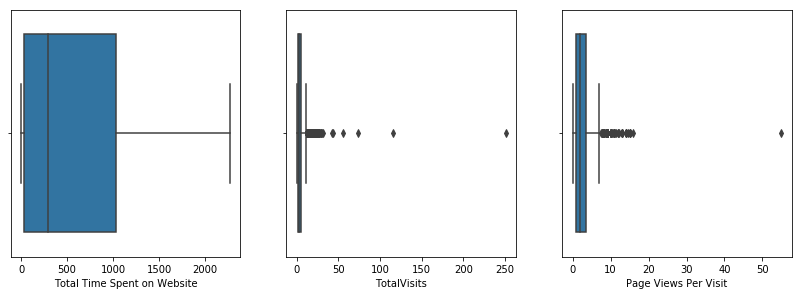

In [30]:
# Plotting the numerical variables
plt.figure(figsize=(14,10))
plt.subplot(2,3,1)
sns.boxplot(lead_df['Total Time Spent on Website'])
plt.subplot(2,3,2)
sns.boxplot(lead_df['TotalVisits'])
plt.subplot(2,3,3)
sns.boxplot(lead_df['Page Views Per Visit'])
plt.show()

The columns `TotalVisits` and `Page Views Per Visit` have outliers in it and needs to be treated

**Handling the Outliers**

In [31]:
# Capping the outliers to its 99th quantile value in Total Visits column
quant = lead_df['TotalVisits'].quantile([0.99])
lead_df['TotalVisits'] = np.clip(lead_df['TotalVisits'],
                                 lead_df['TotalVisits'].quantile([0.01,0.99][0]),
                                 lead_df['TotalVisits'].quantile([0.01,0.99][1]))

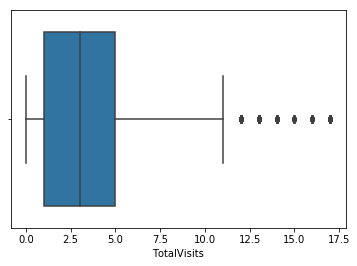

In [32]:
sns.boxplot(lead_df['TotalVisits'])

In [33]:
# Capping the outliers to its 99th quantile value in Page Views Per Visit column
quant = lead_df['Page Views Per Visit'].quantile([0.99])
lead_df['Page Views Per Visit'] = np.clip(lead_df['Page Views Per Visit'],
                                          lead_df['Page Views Per Visit'].quantile([0.01,0.99][0]), 
                                          lead_df['Page Views Per Visit'].quantile([0.01,0.99][1]))

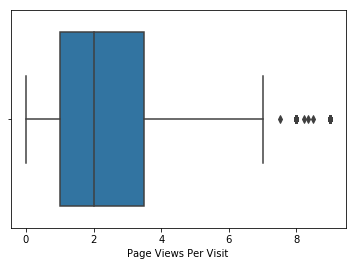

In [34]:
sns.boxplot(lead_df['Page Views Per Visit'])

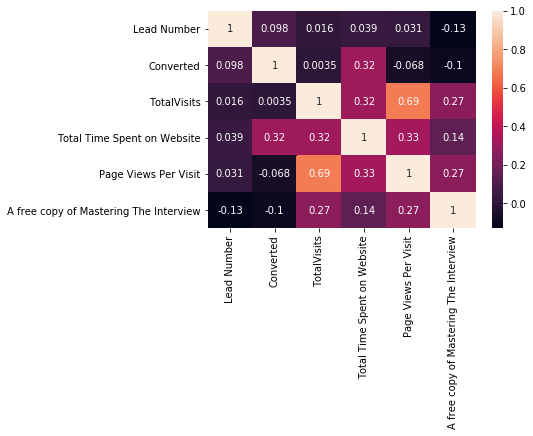

In [35]:
# Correlation Matrix - Heatmap
sns.heatmap(lead_df.corr(), annot=True)

From the heat map we can see that the columns `TotalVisits` and `Page Views Per Visit` are highly correlated.

### Data Preparation

#### Dummy Variables Creation for Categorical variables

In [36]:
# Creating dummy variables for the column Lead Origin
Lead_Origin = pd.get_dummies(lead_df['Lead Origin'], drop_first=True)
Lead_Origin.head()

,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form
0,0,0,0,0
1,0,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [37]:
# Creating dummy variables for the column Lead Source
Lead_Source = pd.get_dummies(lead_df['Lead Source'])
Lead_Source.drop('Others', axis=1, inplace=True)
Lead_Source.head()

,Direct Traffic,Google,Olark Chat,Organic Search,Reference,Referral Sites,Welingak Website
0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0


In [38]:
# Creating dummy variables for the column Lead Activity
Last_Activity = pd.get_dummies(lead_df['Last Activity'], prefix='Last')
Last_Activity.drop('Last_Others', axis=1, inplace=True)
Last_Activity.head()

,Last_Converted to Lead,Last_Email Bounced,Last_Email Link Clicked,Last_Email Opened,Last_Form Submitted on Website,Last_Olark Chat Conversation,Last_Page Visited on Website,Last_SMS Sent,Last_Unreachable
0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0


In [39]:
# Creating dummy variables for the column Specialization
Specialization = pd.get_dummies(lead_df['Specialization'])
Specialization.drop('Others', axis=1, inplace=True)
Specialization.head()

,"Banking, Investment And Insurance",Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
# Creating dummy variables for the column 'What is your current occupation'
occupation = pd.get_dummies(lead_df['What is your current occupation'])
occupation.drop('Other', axis=1, inplace=True)
occupation.head()

,Businessman,Housewife,Student,Unemployed,Working Professional
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [41]:
# Creating dummy variables for the column 'Last Notable Activity'
activity = pd.get_dummies(lead_df['Last Notable Activity'])
activity.drop('Unsubscribed', axis=1, inplace=True)
activity.head()

,Approached upfront,Email Bounced,Email Link Clicked,Email Marked Spam,Email Opened,Email Received,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,SMS Sent,Unreachable,View in browser link Clicked
0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0


In [42]:
# Concatenating all the dummy variables created to the main dataframe
leads = pd.concat([lead_df,Lead_Origin,Lead_Source,occupation,Last_Activity,Specialization,activity], axis=1)
leads.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,Direct Traffic,Google,Olark Chat,Organic Search,Reference,Referral Sites,Welingak Website,Businessman,Housewife,Student,Unemployed,Working Professional,Last_Converted to Lead,Last_Email Bounced,Last_Email Link Clicked,Last_Email Opened,Last_Form Submitted on Website,Last_Olark Chat Conversation,Last_Page Visited on Website,Last_SMS Sent,Last_Unreachable,"Banking, Investment And Insurance",Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Approached upfront,Email Bounced,Email Link Clicked,Email Marked Spam,Email Opened,Email Received,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,SMS Sent,Unreachable,View in browser link Clicked
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0,Modified,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Others,Unemployed,0,Email Opened,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,Email Opened,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [43]:
# Dropping off the original columns
leads.drop(['Lead Origin','Lead Source','What is your current occupation','Last Activity','Specialization'
            ,'Last Notable Activity'], axis=1, inplace=True)
leads.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,Direct Traffic,Google,Olark Chat,Organic Search,Reference,Referral Sites,Welingak Website,Businessman,Housewife,Student,Unemployed,Working Professional,Last_Converted to Lead,Last_Email Bounced,Last_Email Link Clicked,Last_Email Opened,Last_Form Submitted on Website,Last_Olark Chat Conversation,Last_Page Visited on Website,Last_SMS Sent,Last_Unreachable,"Banking, Investment And Insurance",Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Approached upfront,Email Bounced,Email Link Clicked,Email Marked Spam,Email Opened,Email Received,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,SMS Sent,Unreachable,View in browser link Clicked
0,660737,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,660727,1,2.0,1532,2.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,660719,0,1.0,305,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,660681,1,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [44]:
# Number of rows and columns
leads.shape

(6550, 62)

**Correlation Matrix [HeatMap]**

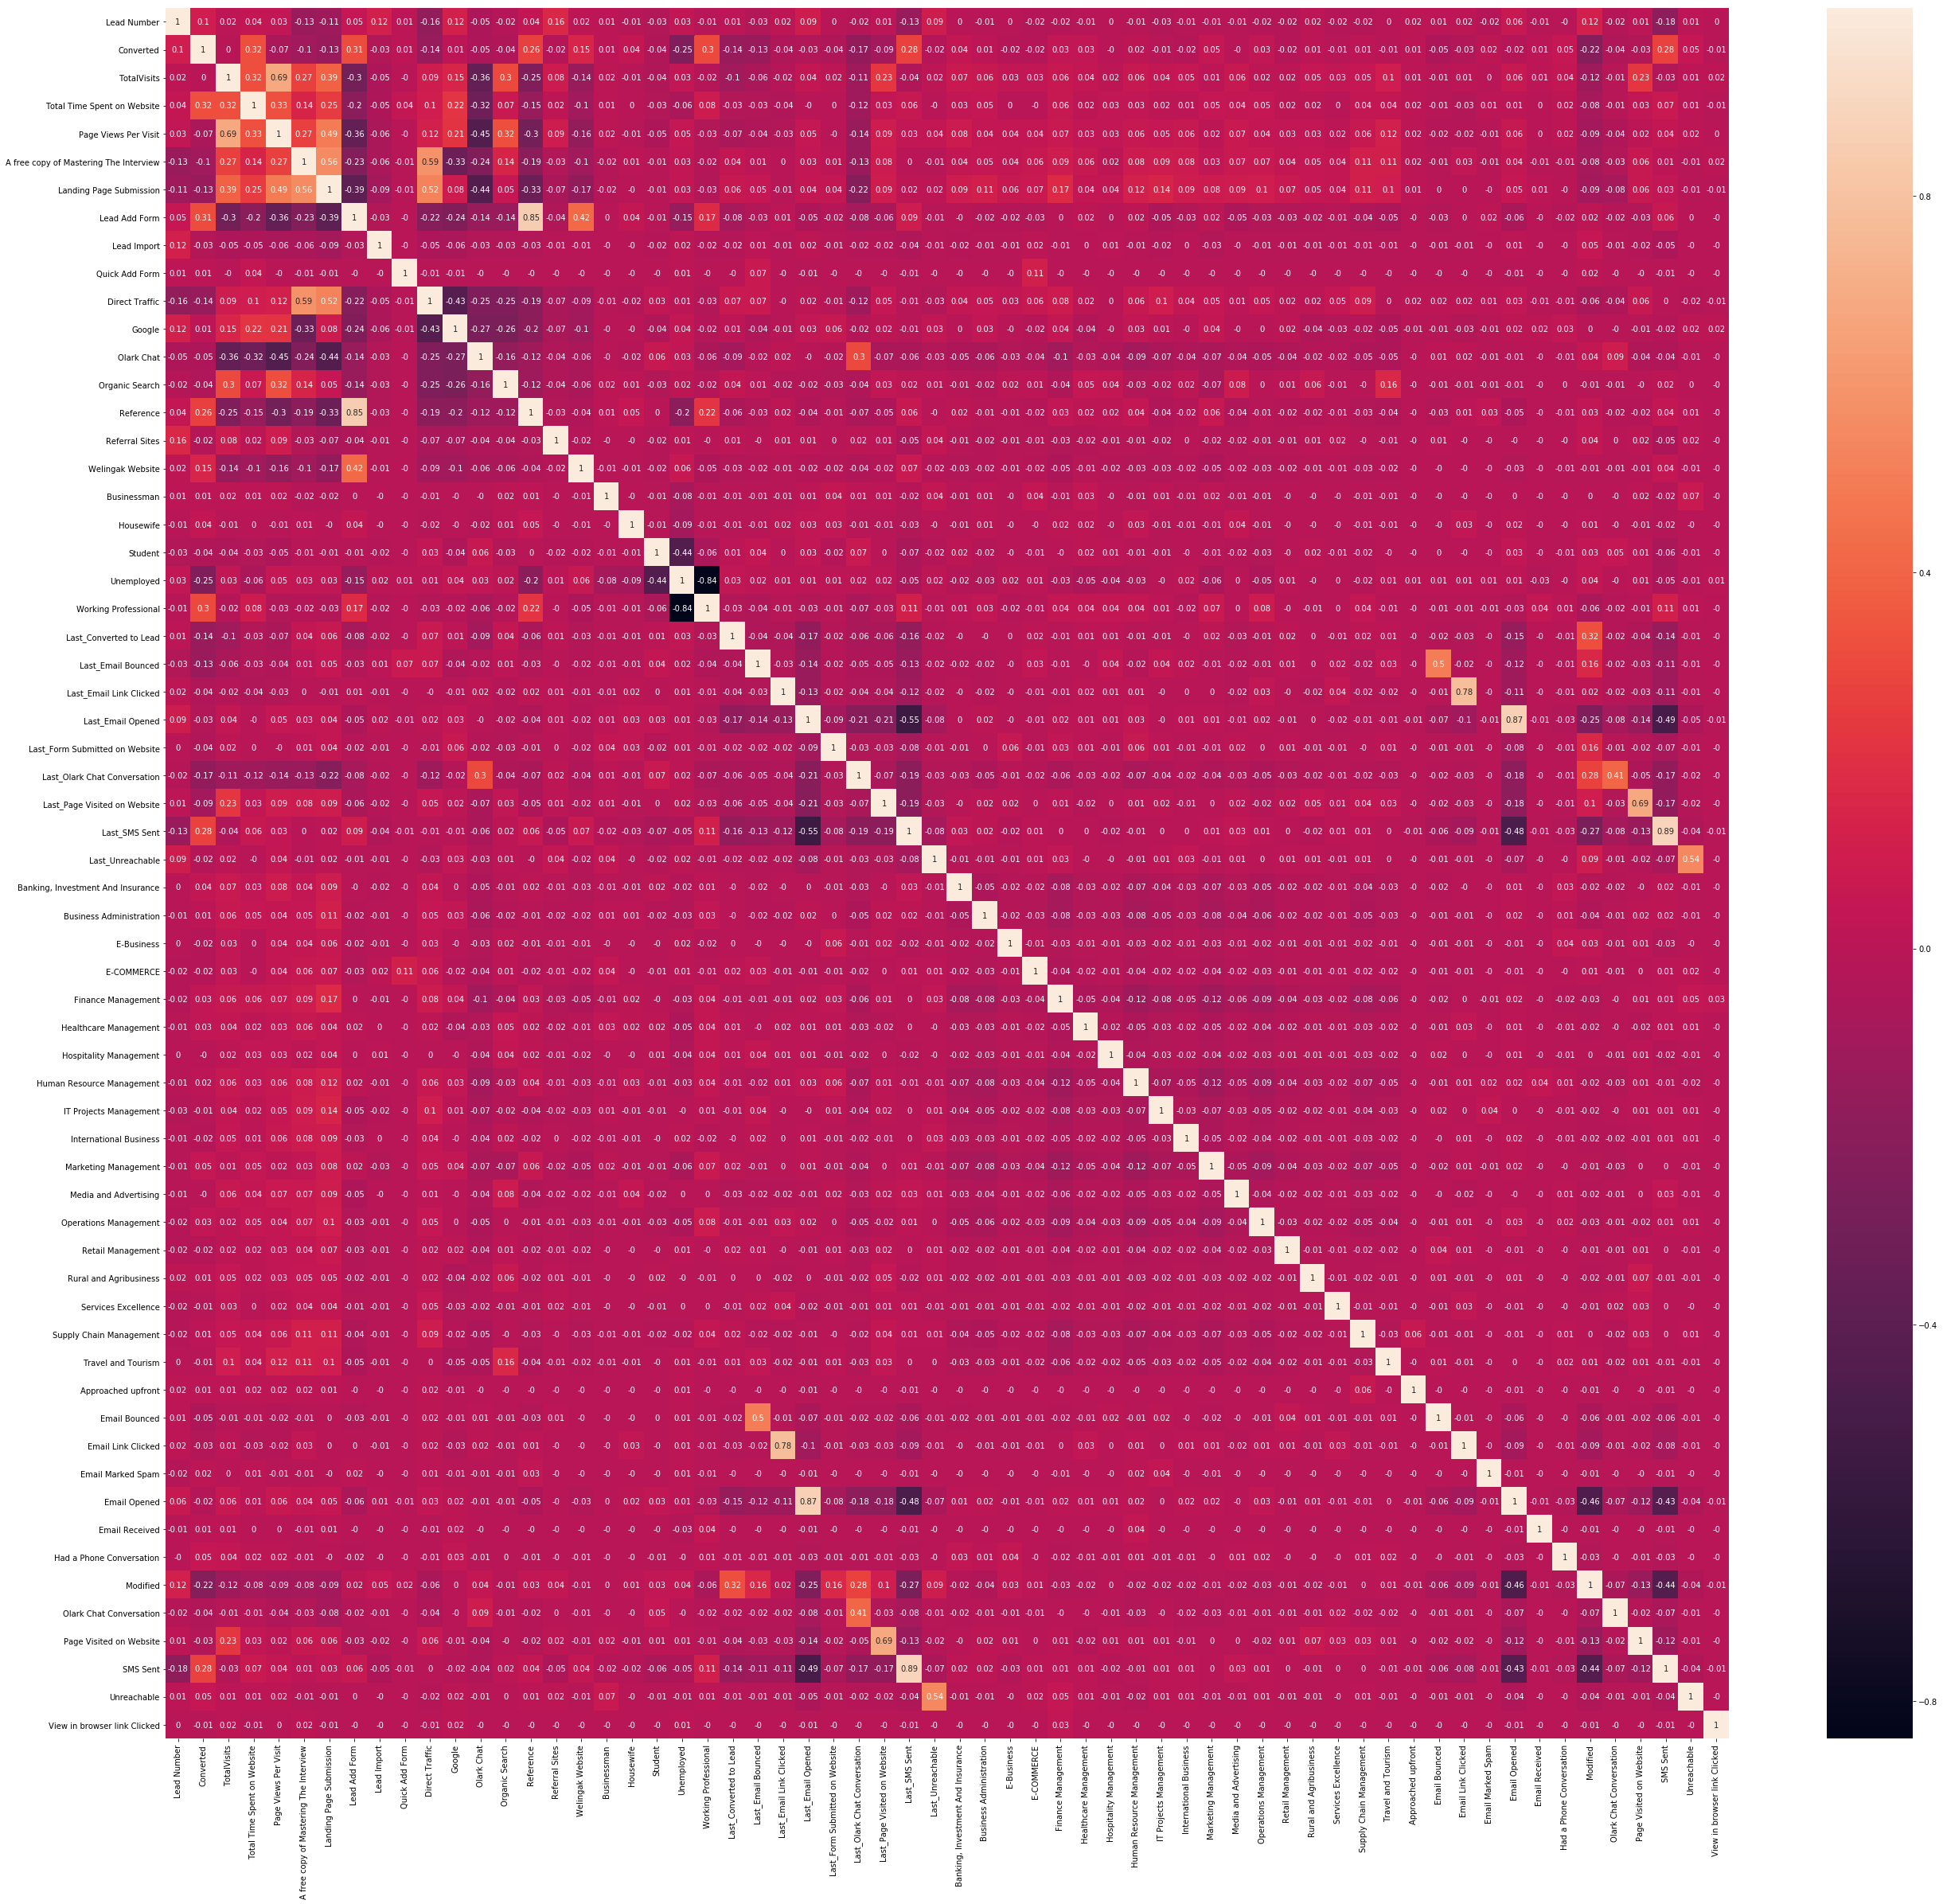

In [45]:
# Plotting the correlation matrix for the dataset
plt.figure(figsize=(44,40))
sns.heatmap(round(leads.corr(),2), annot=True)

In [46]:
# Top 10 highly correlated variables
leads.corr().unstack().sort_values(ascending=False).drop_duplicates().head(10)

View in browser link Clicked  View in browser link Clicked              1.000000
Last_SMS Sent                 SMS Sent                                  0.891211
Email Opened                  Last_Email Opened                         0.867821
Lead Add Form                 Reference                                 0.849109
Last_Email Link Clicked       Email Link Clicked                        0.781954
Page Visited on Website       Last_Page Visited on Website              0.694196
TotalVisits                   Page Views Per Visit                      0.689387
Direct Traffic                A free copy of Mastering The Interview    0.588469
Landing Page Submission       A free copy of Mastering The Interview    0.556974
Unreachable                   Last_Unreachable                          0.543074
dtype: float64

In [47]:
# Top 10 inversely correlated variables
leads.corr().unstack().sort_values(ascending=True).drop_duplicates().head(10)

Working Professional  Unemployed                -0.843878
Last_Email Opened     Last_SMS Sent             -0.553990
SMS Sent              Last_Email Opened         -0.493722
Last_SMS Sent         Email Opened              -0.480764
Email Opened          Modified                  -0.461696
Olark Chat            Page Views Per Visit      -0.450632
                      Landing Page Submission   -0.444912
Unemployed            Student                   -0.441873
Modified              SMS Sent                  -0.436714
Direct Traffic        Google                    -0.429696
dtype: float64

#### Train test split and scaling of data

In [48]:
# Splitting the dataframe into train and test
np.random.seed(0)
df_train, df_test = train_test_split(leads, train_size=0.7, test_size=0.3, random_state=100)

In [49]:
# Scaling the data to bring all in one scale
scaler = StandardScaler()

In [50]:
# Apply the scaling metrics
num_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

C:\Users\vibhu.adithya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\vibhu.adithya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [51]:
# Predictor and Target Variable Split
y_train = df_train.pop('Converted')
X_train = df_train.drop('Lead Number', axis=1)

### Modelling 

- Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

**RFE Approach**

In [52]:
# Performing RFE approach for 15 variables
logreg = LogisticRegression()
rfe = RFE(logreg, 15)         # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [53]:
# RFE result on all variables
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 27),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 28),
 ('A free copy of Mastering The Interview', False, 40),
 ('Landing Page Submission', False, 12),
 ('Lead Add Form', True, 1),
 ('Lead Import', False, 42),
 ('Quick Add Form', False, 37),
 ('Direct Traffic', True, 1),
 ('Google', False, 21),
 ('Olark Chat', True, 1),
 ('Organic Search', False, 19),
 ('Reference', False, 33),
 ('Referral Sites', False, 20),
 ('Welingak Website', True, 1),
 ('Businessman', False, 3),
 ('Housewife', True, 1),
 ('Student', True, 1),
 ('Unemployed', True, 1),
 ('Working Professional', True, 1),
 ('Last_Converted to Lead', False, 2),
 ('Last_Email Bounced', True, 1),
 ('Last_Email Link Clicked', False, 30),
 ('Last_Email Opened', False, 25),
 ('Last_Form Submitted on Website', False, 29),
 ('Last_Olark Chat Conversation', True, 1),
 ('Last_Page Visited on Website', False, 39),
 ('Last_SMS Sent', True, 1),
 ('Last_Unreachable', False, 26),
 ('Banking, 

In [54]:
# Selected 15
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Add Form', 'Direct Traffic',
       'Olark Chat', 'Welingak Website', 'Housewife', 'Student', 'Unemployed',
       'Working Professional', 'Last_Email Bounced',
       'Last_Olark Chat Conversation', 'Last_SMS Sent',
       'Had a Phone Conversation', 'Modified', 'Unreachable'],
      dtype='object')

- Now you have all the variables selected by RFE and to check the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

**Logistic regression using statsmodels [Model 1]**

In [55]:
# Performing logistic regression using stats models
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()
logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4585
Model:                            GLM   Df Residuals:                     4569
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2070.3
Date:                Sun, 31 May 2020   Deviance:                       4140.7
Time:                        01:03:30   Pearson chi2:                 4.71e+03
No. Iterations:                    22   Covariance Type:             nonrobust
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.3407      0.616      0.553      0.580      -0.867       1.548
Total Time Spent on Website      1.1204      0.046     24.189      0.000       1.030       1.211
Lead Add Form                    3.2454      0.200     16.260      0.000       2.854       3.637
Direct Traffic                  -0.6121      0.091     -6.735      0.000      -0.790      -0.434
Olark Chat                       1.2172      0.124      9.849      0.000       0.975       1.459
Welingak Website                 2.5419      1.027      2.476      0.013       0.530       4.554
Housewife                       22.7415   2.41e+04      0.001      0.999   -4.71e+04    4.72e+04
Student                         -0.9466      0.651     -1.455      0.146      -2.222       0.328
Unemployed                      -0.9272      0.615     -1.508      0.131      -2.132       0.277
Working Professional             1.6498      0.640      2.580      0.010       0.396       2.903
Last_Email Bounced              -1.3228      0.305     -4.338      0.000      -1.920      -0.725
Last_Olark Chat Conversation    -0.8338      0.192     -4.336      0.000      -1.211      -0.457
Last_SMS Sent                    0.9910      0.084     11.774      0.000       0.826       1.156
Had a Phone Conversation        23.6027   2.26e+04      0.001      0.999   -4.43e+04    4.43e+04
Modified                        -0.8649      0.093     -9.342      0.000      -1.046      -0.683
Unreachable                      2.5658      0.814      3.152      0.002       0.970       4.162
================================================================================================
"""

In [56]:
# Calculating the VIF values
VIF = pd.DataFrame()
VIF['Features'] = X_train[col].columns
VIF['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = 'VIF', ascending = False)
VIF

,Features,VIF
7,Unemployed,3.20
13,Modified,1.78
11,Last_SMS Sent,1.72
1,Lead Add Form,1.63
2,Direct Traffic,1.62
3,Olark Chat,1.58
8,Working Professional,1.43
10,Last_Olark Chat Conversation,1.34
4,Welingak Website,1.24
0,Total Time Spent on Website,1.21


The VIF Value for all the columns are less than 5. But there are few columns which has high p-values. So based on high p-value, the column `Had a Phone Conversation` should be dropped.

In [57]:
# Dropping the column with high p-value
col = col.drop('Had a Phone Conversation')
col

Index(['Total Time Spent on Website', 'Lead Add Form', 'Direct Traffic',
       'Olark Chat', 'Welingak Website', 'Housewife', 'Student', 'Unemployed',
       'Working Professional', 'Last_Email Bounced',
       'Last_Olark Chat Conversation', 'Last_SMS Sent', 'Modified',
       'Unreachable'],
      dtype='object')

**Logistic regression using statsmodels [Model 2]**

In [58]:
# Performing logistic regression using stats models
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4585
Model:                            GLM   Df Residuals:                     4570
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2075.0
Date:                Sun, 31 May 2020   Deviance:                       4150.0
Time:                        01:03:30   Pearson chi2:                 4.72e+03
No. Iterations:                    21   Covariance Type:             nonrobust
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.3447      0.616      0.559      0.576      -0.863       1.553
Total Time Spent on Website      1.1197      0.046     24.216      0.000       1.029       1.210
Lead Add Form                    3.2408      0.200     16.240      0.000       2.850       3.632
Direct Traffic                  -0.6121      0.091     -6.744      0.000      -0.790      -0.434
Olark Chat                       1.2122      0.123      9.819      0.000       0.970       1.454
Welingak Website                 2.5420      1.027      2.476      0.013       0.530       4.554
Housewife                       21.7411   1.46e+04      0.001      0.999   -2.86e+04    2.86e+04
Student                         -0.9458      0.651     -1.454      0.146      -2.221       0.329
Unemployed                      -0.9215      0.615     -1.499      0.134      -2.126       0.283
Working Professional             1.6552      0.640      2.588      0.010       0.402       2.909
Last_Email Bounced              -1.3269      0.305     -4.352      0.000      -1.925      -0.729
Last_Olark Chat Conversation    -0.8356      0.192     -4.345      0.000      -1.212      -0.459
Last_SMS Sent                    0.9832      0.084     11.693      0.000       0.818       1.148
Modified                        -0.8711      0.093     -9.416      0.000      -1.052      -0.690
Unreachable                      2.5560      0.814      3.140      0.002       0.960       4.152
================================================================================================
"""

In [59]:
# Calculating the VIF values
VIF = pd.DataFrame()
VIF['Features'] = X_train[col].columns
VIF['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = 'VIF', ascending = False)
VIF

,Features,VIF
7,Unemployed,3.19
12,Modified,1.77
11,Last_SMS Sent,1.72
1,Lead Add Form,1.63
2,Direct Traffic,1.62
3,Olark Chat,1.58
8,Working Professional,1.42
10,Last_Olark Chat Conversation,1.34
4,Welingak Website,1.24
0,Total Time Spent on Website,1.21


The VIF Value for all the columns are less than 5. But there are few columns which has high p-values. So based on high p-value, the column `Housewife` should be dropped.

In [60]:
# Dropping the column with high p-value
col = col.drop('Housewife')
col

Index(['Total Time Spent on Website', 'Lead Add Form', 'Direct Traffic',
       'Olark Chat', 'Welingak Website', 'Student', 'Unemployed',
       'Working Professional', 'Last_Email Bounced',
       'Last_Olark Chat Conversation', 'Last_SMS Sent', 'Modified',
       'Unreachable'],
      dtype='object')

**Logistic regression using statsmodels [Model 3]**

In [61]:
# Performing logistic regression using stats models
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()
logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4585
Model:                            GLM   Df Residuals:                     4571
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2077.4
Date:                Sun, 31 May 2020   Deviance:                       4154.9
Time:                        01:03:31   Pearson chi2:                 4.72e+03
No. Iterations:                     7   Covariance Type:             nonrobust
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.9303      0.530      1.756      0.079      -0.108       1.969
Total Time Spent on Website      1.1188      0.046     24.203      0.000       1.028       1.209
Lead Add Form                    3.2419      0.199     16.264      0.000       2.851       3.633
Direct Traffic                  -0.6192      0.091     -6.826      0.000      -0.797      -0.441
Olark Chat                       1.2087      0.123      9.795      0.000       0.967       1.451
Welingak Website                 2.5373      1.027      2.472      0.013       0.525       4.549
Student                         -1.5277      0.570     -2.679      0.007      -2.645      -0.410
Unemployed                      -1.5044      0.529     -2.846      0.004      -2.541      -0.468
Working Professional             1.0724      0.557      1.924      0.054      -0.020       2.165
Last_Email Bounced              -1.3279      0.305     -4.355      0.000      -1.926      -0.730
Last_Olark Chat Conversation    -0.8449      0.192     -4.393      0.000      -1.222      -0.468
Last_SMS Sent                    0.9830      0.084     11.691      0.000       0.818       1.148
Modified                        -0.8698      0.092     -9.411      0.000      -1.051      -0.689
Unreachable                      2.5536      0.815      3.135      0.002       0.957       4.150
================================================================================================
"""

In [62]:
# Calculating the VIF values
VIF = pd.DataFrame()
VIF['Features'] = X_train[col].columns
VIF['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = 'VIF', ascending = False)
VIF

,Features,VIF
6,Unemployed,3.18
11,Modified,1.77
10,Last_SMS Sent,1.72
1,Lead Add Form,1.62
2,Direct Traffic,1.62
3,Olark Chat,1.58
7,Working Professional,1.42
9,Last_Olark Chat Conversation,1.34
4,Welingak Website,1.24
0,Total Time Spent on Website,1.21


Since all the p-values and VIF values are low for all the columns, let's consider the `Model 3` as the final model

### Model Evaluation

In [63]:
# Predicting the target values based on the predictor values using the final model
y_train_pred = logm3.predict(X_train_sm)

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.24886037, 0.2329414 , 0.94751212, 0.63350154, 0.99404657,
       0.88677715, 0.21695969, 0.34200957, 0.6743161 , 0.19547426])

#### Actual vs Predicted

In [64]:
# Creating a dataframe with the actual conversion flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_Prob
0,0,0.248860
1,0,0.232941
2,1,0.947512
3,1,0.633502
4,1,0.994047


#### Random Cut-off for Predicted

In [65]:
# Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted
0,0,0.248860,0
1,0,0.232941,0
2,1,0.947512,1
3,1,0.633502,1
4,1,0.994047,1


#### Evaluate the model using Confusion Matrix

In [66]:
# Plot the confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[1983,  395],
       [ 563, 1644]], dtype=int64)

In [1]:
## Predicted       Not Converted     Converted
## Actual
## Not Converted        1983            395
## Converted             563           1644

In [67]:
# Calculating the accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7910577971646674

In [68]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [69]:
# Calculate the sensitivity

TP/(TP+FN)

0.7449025826914364

In [70]:
# Calculate the specificity

TN/(TN+FP)

0.8338940285954584

For the chosen random cut-off probability value, the Sensitivity is lower compared to specificity which clearly suggests that it's not the optimal cut-off. Let's check the ROC curve for the same.

**ROC Curve**

In [71]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

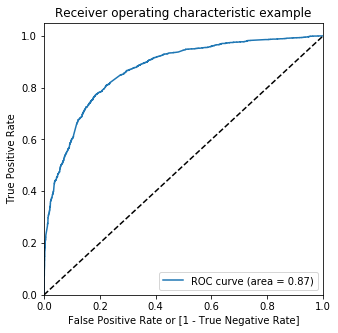

In [72]:
# Plotting the ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False)

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

The area under the ROC curve is 0.87 which indicates that the chosen cut-off may not be optimal and some better cut-off could be used

**Optimal Cut-Off Selection**

In [73]:
# Creating columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.248860,0,1,1,1,0,0,0,0,0,0,0
1,0,0.232941,0,1,1,1,0,0,0,0,0,0,0
2,1,0.947512,1,1,1,1,1,1,1,1,1,1,1
3,1,0.633502,1,1,1,1,1,1,1,1,0,0,0
4,1,0.994047,1,1,1,1,1,1,1,1,1,1,1


In [74]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

num = [float(x)/10 for x in range(10)]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481352  1.000000  0.000000
0.1   0.1  0.574918  0.986860  0.192599
0.2   0.2  0.706870  0.949252  0.481918
0.3   0.3  0.764885  0.895333  0.643818
0.4   0.4  0.789095  0.812868  0.767031
0.5   0.5  0.791058  0.744903  0.833894
0.6   0.6  0.779935  0.683280  0.869638
0.7   0.7  0.741985  0.551427  0.918839
0.8   0.8  0.713413  0.456275  0.952061
0.9   0.9  0.658670  0.307657  0.984441


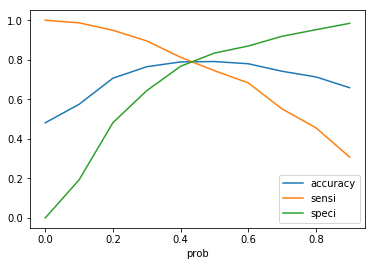

In [75]:
# Plotting the probability value across accuracy, sensitivity and specificity

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around 0.38, you get the optimal values of the three metrics. So let's choose `0.38` as our cutoff now.

**Predicting with the Optimal cut-off**

In [76]:
# The predictions are done with the new optimal cut-off value
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.38 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.248860,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.232941,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.947512,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.633502,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.994047,1,1,1,1,1,1,1,1,1,1,1,1


In [77]:
# Confusion Matrix
confusion_train = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)
confusion_train

array([[1691,  687],
       [ 317, 1890]], dtype=int64)

In [2]:
## Predicted       Not Converted     Converted
## Actual
## Not Converted        1691            687
## Converted             317           1890

In [78]:
# Calculating the accuracy score
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7910577971646674

In [79]:
# Let's evaluate the other metrics as well

TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

In [80]:
# Calculate the sensitivity

TP/(TP+FN)

0.856366107838695

In [81]:
# Calculate the specificity

TN/(TN+FP)

0.7111017661900757

In [82]:
# calculate precision

TP/(TP+FP)

0.7334109429569267

In [83]:
# calculate F1-Score

metrics.f1_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.7901337792642141

With the chosen optimal cut-off, `0.38`:
1. Sensitivity is high compared to specificity
2. Precision is also high
3. The F1-Score is almost 79% which means the model has a better performance

### Making prediction on Test set

#### Scaling the test dataset

In [84]:
# Popping out the target variable from the test data
y_test = df_test.pop('Converted')

# Scaling the test using the same metrics used for train
df_test[num_vars] = scaler.transform(df_test[num_vars])

C:\Users\vibhu.adithya\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [85]:
# Scaled Test Predictor variables
X_test = df_test[col]
X_test.head()

,Total Time Spent on Website,Lead Add Form,Direct Traffic,Olark Chat,Welingak Website,Student,Unemployed,Working Professional,Last_Email Bounced,Last_Olark Chat Conversation,Last_SMS Sent,Modified,Unreachable
5966,-0.512016,0,0,0,0,0,1,0,0,0,1,0,0
152,-0.548637,0,1,0,0,0,1,0,1,0,0,1,0
5132,-0.646291,0,0,0,0,0,1,0,0,0,0,0,0
5308,-0.709069,0,1,0,0,0,1,0,0,0,0,0,0
5021,1.240536,0,0,0,0,0,1,0,0,0,1,0,0


#### Predicting on the test dataset

In [86]:
# Predicting on test dataset using the final model
X_test_sm = sm.add_constant(X_test)
y_test_pred = logm3.predict(X_test_sm)
y_test_pred.head()

5966    0.459107
152     0.017903
5132    0.214649
5308    0.120623
5021    0.857759
dtype: float64

In [87]:
# Creating a dataframe with the predicted probabilities
y_test_pred = pd.DataFrame(y_test_pred, columns=['Converted_Prob'], dtype='float64')
y_test_pred.head()

,Converted_Prob
5966,0.459107
152,0.017903
5132,0.214649
5308,0.120623
5021,0.857759


In [88]:
# Creating a dataframe with the target values
y_test = pd.DataFrame(y_test, columns=['Converted'], dtype='int64')
y_test.head()

,Converted
5966,0
152,0
5132,0
5308,0
5021,1


In [89]:
# Creating new datafram with target variable and predicted variable
y_test_final = pd.concat([y_test, y_test_pred], axis=1)
y_test_final.head()

,Converted,Converted_Prob
5966,0,0.459107
152,0,0.017903
5132,0,0.214649
5308,0,0.120623
5021,1,0.857759


**Predicting the Test data using the optimal cut-off chosen**

In [90]:
# Creating new column 'Predicted' with 1 if Converted_Prob > 0.38 else 0
y_test_final['Predicted'] = y_test_final.Converted_Prob.map(lambda x: 1 if x > 0.38 else 0)
y_test_final.head()

,Converted,Converted_Prob,Predicted
5966,0,0.459107,1
152,0,0.017903,0
5132,0,0.214649,0
5308,0,0.120623,0
5021,1,0.857759,1


#### Evaluate the model using Confusion Matrix

In [91]:
# Confusion Matrix
confusion_test = metrics.confusion_matrix(y_test_final.Converted, y_test_final.Predicted)
confusion_test

array([[697, 284],
       [160, 824]], dtype=int64)

In [3]:
## Predicted       Not Converted     Converted
## Actual
## Not Converted         697            284
## Converted             160            824

In [92]:
# Calculating the Accuracy
metrics.accuracy_score(y_test_final.Converted, y_test_final.Predicted)

0.7740458015267175

In [93]:
# Let's evaluate the other metrics as well

TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [94]:
# Calculate the sensitivity

TP/(TP+FN)

0.8373983739837398

In [95]:
# Calculate the specificity

TN/(TN+FP)

0.7104994903160041

In [96]:
# calculate precision

TP/(TP+FP)

0.7436823104693141

In [97]:
# calculate F1-Score

metrics.f1_score(y_test_final.Converted, y_test_final.Predicted)

0.7877629063097515

For the test data:
1. The Accuracy is high
2. Sensitivity is high compared to specificity
3. Precision is also pretty high
4. F1-score is about 78%

Overall the final model looks good after evaluation

### Precision and Recall

#### On train dataset

In [98]:
# Confusion Matrix
confusion_train = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)
confusion_train

array([[1691,  687],
       [ 317, 1890]], dtype=int64)

In [4]:
## Predicted       Not Converted     Converted
## Actual
## Not Converted        1691            687
## Converted             317           1890

In [99]:
# calculate precision
# TP/(TP+FP)

confusion_train[1,1]/(confusion_train[1,1] + confusion_train[0,1])

0.7334109429569267

In [100]:
# calculate recall
# TP/(TP+FN)

confusion_train[1,1]/(confusion_train[1,1] + confusion_train[1,0])

0.856366107838695

Precision is less when compared to Recall

#### Precision and Recall tradeoff

In [101]:
p, r, thres = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

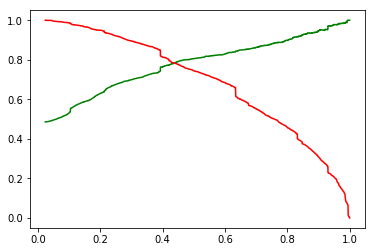

In [102]:
plt.plot(thres, p[:-1], "g-")
plt.plot(thres, r[:-1], "r-")
plt.show()

Based on the trade-off value 0.4 is chosen as the threshold for final prediction

**Making Final Predictions using `0.4` as the cut-off value**

In [103]:
# Creating new column 'Final_Pred_PR' with 1 if Converted_Prob > 0.4 else 0 and evaluating the model
y_train_pred_final['Final_Pred_PR'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted,Final_Pred_PR
0,0,0.248860,0,1,1,1,0,0,0,0,0,0,0,0,0
1,0,0.232941,0,1,1,1,0,0,0,0,0,0,0,0,0
2,1,0.947512,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.633502,1,1,1,1,1,1,1,1,0,0,0,1,1
4,1,0.994047,1,1,1,1,1,1,1,1,1,1,1,1,1


In [104]:
# Confusion Matrix
confusion_pr = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Pred_PR)
confusion_pr

array([[1824,  554],
       [ 413, 1794]], dtype=int64)

In [105]:
# Calculating the accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Pred_PR)

0.7890948745910578

In [106]:
# Let's evaluate the other metrics as well

TP = confusion_pr[1,1] # true positive 
TN = confusion_pr[0,0] # true negatives
FP = confusion_pr[0,1] # false positives
FN = confusion_pr[1,0] # false negatives

In [107]:
# Calculate the recall

TP/(TP+FN)

0.8128681468056185

In [108]:
# calculate precision

TP/(TP+FP)

0.7640545144804088

In [109]:
# calculate F1-Score

metrics.f1_score(y_test_final.Converted, y_test_final.Predicted)

0.7877629063097515

#### Prediction on the test dataset

In [110]:
# Creating new column 'Predicted_PR' with 1 if Converted_Prob > 0.4 else 0 and evaluating the model
y_test_final['Predicted_PR'] = y_test_final.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)
y_test_final.head()

,Converted,Converted_Prob,Predicted,Predicted_PR
5966,0,0.459107,1,1
152,0,0.017903,0,0
5132,0,0.214649,0,0
5308,0,0.120623,0,0
5021,1,0.857759,1,1


In [111]:
# Confusion Matrix
confusion_test_pr = metrics.confusion_matrix(y_test_final.Converted, y_test_final.Predicted_PR)
confusion_test_pr

array([[751, 230],
       [205, 779]], dtype=int64)

In [5]:
## Predicted       Not Converted     Converted
## Actual
## Not Converted         751            230
## Converted             205            779

In [112]:
# Calculating the accuracy
metrics.accuracy_score(y_test_final.Converted, y_test_final.Predicted_PR)

0.7786259541984732

In [113]:
# Let's evaluate the other metrics as well

TP = confusion_test_pr[1,1] # true positive 
TN = confusion_test_pr[0,0] # true negatives
FP = confusion_test_pr[0,1] # false positives
FN = confusion_test_pr[1,0] # false negatives

In [114]:
# Calculate the recall

TP/(TP+FN)

0.7916666666666666

In [115]:
# calculate precision

TP/(TP+FP)

0.7720515361744301

In [116]:
# calculate F1-Score

metrics.f1_score(y_test_final.Converted, y_test_final.Predicted)

0.7877629063097515

Based on the predictions:
1. Precision is low compared to the Recall
2. F1-Score is around 78%

### Assigning Lead Scores on test dataset

In [117]:
# Lead Score function
def score(x):
    return int(100-74+(7*log(x/(1-x))/log(2)))

y_test_final['Score'] = y_test_final.Converted_Prob.apply(score)

In [118]:
y_test_final.head()

,Converted,Converted_Prob,Predicted,Predicted_PR,Score
5966,0,0.459107,1,1,24
152,0,0.017903,0,0,-14
5132,0,0.214649,0,0,12
5308,0,0.120623,0,0,5
5021,1,0.857759,1,1,44


In [119]:
# Assign the score to 0 for those having negative scores
y_test_final.Score[y_test_final.Score < 0] = 0

In [120]:
# Top 5 Leads based on their lead score
y_test_final.sort_values(by='Score', ascending=False).head()

,Converted,Converted_Prob,Predicted,Predicted_PR,Score
7219,1,0.999380,1,1,100
8074,1,0.998534,1,1,91
1614,1,0.997925,1,1,88
5921,1,0.997544,1,1,86
7211,1,0.997265,1,1,85


In [121]:
# Concatenating X and y to find out the details about the leads using their lead scores
lead_score = pd.concat([X_test_sm, y_test_final], axis=1)

In [122]:
# Top 5 Leads based on their lead score
lead_score.sort_values(by='Score', ascending=False).head()

,const,Total Time Spent on Website,Lead Add Form,Direct Traffic,Olark Chat,Welingak Website,Student,Unemployed,Working Professional,Last_Email Bounced,Last_Olark Chat Conversation,Last_SMS Sent,Modified,Unreachable,Converted,Converted_Prob,Predicted,Predicted_PR,Score
7219,1.0,1.069640,1,0,0,1,0,1,0,0,0,1,0,0,1,0.999380,1,1,100
8074,1.0,1.920630,1,0,0,0,0,0,1,0,0,0,1,0,1,0.998534,1,1,91
1614,1.0,0.867355,1,0,0,1,0,1,0,0,0,0,0,0,1,0.997925,1,1,88
5921,1.0,1.458515,1,0,0,0,0,0,1,0,0,0,1,0,1,0.997544,1,1,86
7211,1.0,0.584854,1,0,0,0,0,0,1,0,0,0,0,0,1,0.997265,1,1,85


In [123]:
# Least 5 Leads based on their lead score
lead_score.sort_values(by='Score').head()

,const,Total Time Spent on Website,Lead Add Form,Direct Traffic,Olark Chat,Welingak Website,Student,Unemployed,Working Professional,Last_Email Bounced,Last_Olark Chat Conversation,Last_SMS Sent,Modified,Unreachable,Converted,Converted_Prob,Predicted,Predicted_PR,Score
6424,1.0,-0.770103,0,0,0,0,0,1,0,1,0,0,1,0,0,0.025747,0,0,0
9143,1.0,-0.407386,0,1,0,0,0,1,0,0,0,0,1,0,0,0.074551,0,0,0
5274,1.0,-0.532942,0,1,0,0,0,1,0,0,0,0,1,0,0,0.065420,0,0,0
8798,1.0,-0.555612,0,1,0,0,0,1,0,0,0,0,1,0,1,0.063887,0,0,0
1082,1.0,-0.736971,0,1,0,0,0,1,0,0,0,0,1,0,0,0.052774,0,0,0


**Hot Leads**

In [124]:
# The leads with score greater than 70 will give us the hot leads
y_test_final[y_test_final.Score > 70].sort_values(by='Score').count()

Converted         69
Converted_Prob    69
Predicted         69
Predicted_PR      69
Score             69
dtype: int64

**Converted Leads even when they weren't reached on Phone**

In [127]:
lead_score[lead_score.Unreachable == 1]

,const,Total Time Spent on Website,Lead Add Form,Direct Traffic,Olark Chat,Welingak Website,Student,Unemployed,Working Professional,Last_Email Bounced,Last_Olark Chat Conversation,Last_SMS Sent,Modified,Unreachable,Converted,Converted_Prob,Predicted,Predicted_PR,Score
7766,1.0,-0.853807,0,0,0,0,0,0,1,0,0,0,0,1,1,0.973432,1,1,62
2285,1.0,-0.956694,1,0,0,0,0,1,0,0,0,0,0,1,1,0.984497,1,1,67
4197,1.0,-0.956694,1,0,0,0,0,1,0,0,0,0,0,1,1,0.984497,1,1,67
8479,1.0,0.344206,0,0,0,0,0,1,0,0,0,0,0,1,1,0.914087,1,1,49
358,1.0,-0.956694,0,0,1,0,0,1,0,0,0,0,0,1,1,0.892627,1,1,47


**Summary**

- The equation for Logistic Regression based on the final model `Model 3` is:
 $ Converted = 0.9303 \times const + 1.1188 \times Total Time Spent on Website + 3.2419 \times Lead Add Form
-0.6192 \times Direct Traffic + 1.2087 \times Olark Chat + 2.5373 \times Welingak Website	
-1.5277 \times Student	-1.5044 \times Unemployed + 1.0724 \times Working Professional
-1.3279 \times Last\_Email Bounced -0.8449 \times Last\_Olark Chat Conversation
+0.9830 \times Last\_SMS Sent -0.8698 \times Modified + 2.5536 \times Unreachable $

- The Optimal cut-off chosen is `0.38`

- Model Accuracy:`0.7740458015267175`

- Sensitivty:`0.8373983739837398`

- Specificity:`0.7104994903160041`

- F1-Score:`0.7877629063097515`

- After Precision-Recall Tradeoff, the cut-off for probability is `0.4`

- Model Accuracy:`0.7786259541984732`

- Precision:`0.7720515361744301`

- Recall:`0.7916666666666666`

- F1-Score:`0.7877629063097515`